### 환자 count
- 월 별
- 요일 별
- 년도 별
- 년/월 별

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.rc('font',family='Malgun Gothic')


In [2]:
df1 = pd.read_csv('Medical_Image_Data_01.csv', encoding='cp949')
df2 = pd.read_csv('Patient_Diagnosis_Data.csv')
df3 = pd.read_csv('Patient_Surgery_Data.csv')
df1.isnull().sum()

환자ID                0
전방디스크높이(mm)         0
후방디스크높이(mm)         0
지방축적도               3
Instability         0
MF + ES             0
Modic change        0
PI                  4
PT                  4
Seg Angle(raw)      1
Vaccum disc         0
골밀도               896
디스크단면적              1
디스크위치               0
척추이동척도              0
척추전방위증              0
dtype: int64

In [3]:
import matplotlib.pyplot as plt
import matplotlib

plt.rc('font', family='NanumBarunGothic')
matplotlib.rc('axes',unicode_minus=False)

In [4]:
merge1 = pd.merge(df1, df2, on='환자ID', how='inner')
final = pd.merge(merge1, df3, on=['환자ID','연령', '입원일자', '신장', '체중', '퇴원일자', '헤모글로빈수치', '환자통증정도', '통증기간(월)'],how='inner')
final.columns

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'Large Lymphocyte',
       'Location of herniation', 'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수',
       '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환',
       '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업', '체중', '퇴원일자',
       '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법', '수술시간',
       '수술실패여부', '수술일자', '재발여부', '혈액형'],
      dtype='object')

수술 수 관련하여 분석하기

In [5]:
import statsmodels.tsa.api as tsa

In [6]:
from pylab import rcParams 

In [7]:
final.head()

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,혈전합병증여부,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,10,0,1.0,TELD,68.0,0,20190715,0,RH+A
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,10,0,1.0,TELD,31.0,0,20190716,0,RH+A
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,7,0,1.0,TELD,78.0,0,20190731,0,RH+B
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,7,0,2.0,TELD,73.0,0,20190802,0,RH+O
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,7,0,1.0,TELD,29.0,0,20190906,0,RH+A


In [8]:
final.columns

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'Large Lymphocyte',
       'Location of herniation', 'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수',
       '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환',
       '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업', '체중', '퇴원일자',
       '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법', '수술시간',
       '수술실패여부', '수술일자', '재발여부', '혈액형'],
      dtype='object')

In [9]:
#수술 일자 관련
final['수술일자(date)'] = pd.to_datetime(final['수술일자'], format='%Y%m%d')

In [10]:
final['수술일자(date)']

0      2019-07-15
1      2019-07-16
2      2019-07-31
3      2019-08-02
4      2019-09-06
          ...    
1889   2017-04-07
1890   2017-04-27
1891   2017-04-11
1892   2017-04-10
1893   2017-04-12
Name: 수술일자(date), Length: 1894, dtype: datetime64[ns]

In [11]:
final['수술일자(date)'].unique

<bound method Series.unique of 0      2019-07-15
1      2019-07-16
2      2019-07-31
3      2019-08-02
4      2019-09-06
          ...    
1889   2017-04-07
1890   2017-04-27
1891   2017-04-11
1892   2017-04-10
1893   2017-04-12
Name: 수술일자(date), Length: 1894, dtype: datetime64[ns]>

In [12]:
final['수술일자(count)'] = 1
final.head()

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술일자(date),수술일자(count)
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,1.0,TELD,68.0,0,20190715,0,RH+A,2019-07-15,1
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,1.0,TELD,31.0,0,20190716,0,RH+A,2019-07-16,1
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,1.0,TELD,78.0,0,20190731,0,RH+B,2019-07-31,1
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,2.0,TELD,73.0,0,20190802,0,RH+O,2019-08-02,1
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,1.0,TELD,29.0,0,20190906,0,RH+A,2019-09-06,1


In [13]:
# 수술 일자 count
final_series = pd.pivot_table(data=final, index='수술일자(date)', values= '수술일자(count)', aggfunc='sum')
final_series

,수술일자(count)
수술일자(date),
2009-01-20,1
2009-01-30,1
2009-03-11,1
2009-03-28,1
2009-04-01,2
...,...
2020-07-29,1
2020-07-30,3
2020-07-31,5


- 특정 주기 단위로 분할 : 1 주일 단위구간

In [14]:
w = final_series['수술일자(count)'].resample('1W').sum()

1W : 1 주일 단위 구간

In [15]:
# w1 = w.fillna(w.mean())

In [16]:
# w1

In [17]:
rcParams['figure.figsize'] = 15,10

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [18]:
w1 = w.fillna(0)

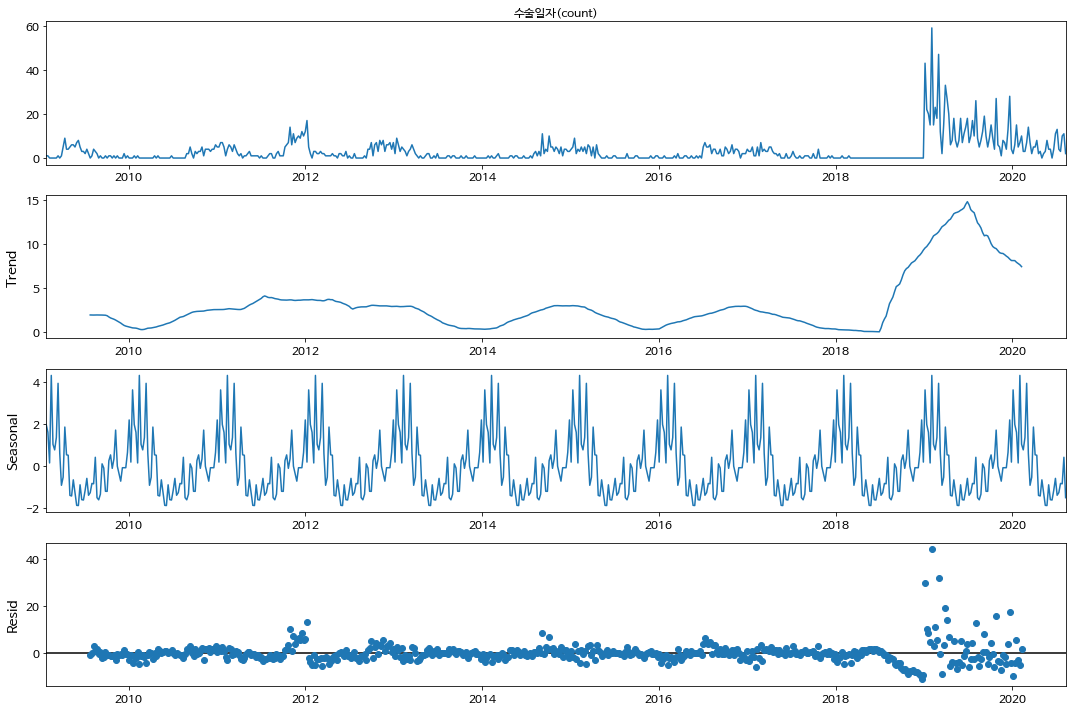

In [19]:
model_series = tsa.seasonal_decompose(w1, model='additive')
fig = model_series.plot()
plt.show()

resid : 잔차

- 특정 주기 단위로 분할 : 1달 단위구간

In [20]:
m = final_series['수술일자(count)'].resample('1M').sum()

1M : 1달 단위 구간

In [21]:
import statsmodels.tsa.api as tsa

In [22]:
m1 = m.fillna(0)

In [23]:
m1

수술일자(date)
2009-01-31     2
2009-02-28     0
2009-03-31     2
2009-04-30    25
2009-05-31    26
              ..
2020-04-30    13
2020-05-31    17
2020-06-30    27
2020-07-31    33
2020-08-31     2
Freq: M, Name: 수술일자(count), Length: 140, dtype: int64

In [24]:
rcParams['figure.figsize'] = 15,10

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

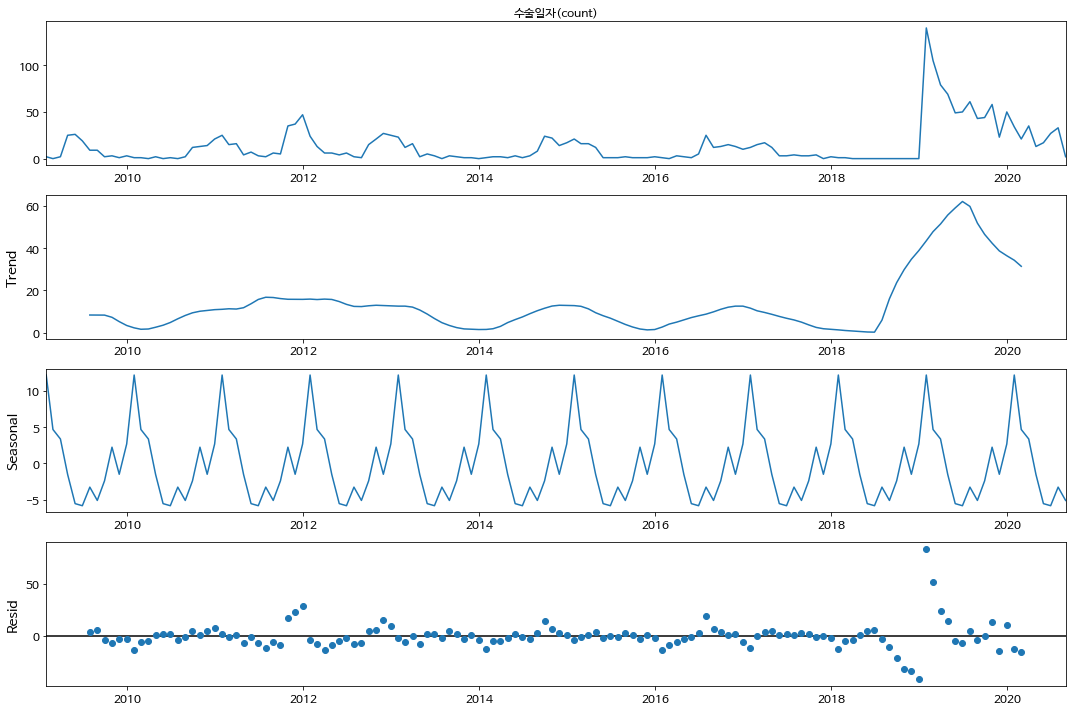

In [25]:
model_series = tsa.seasonal_decompose(m1, model='additive')
fig = model_series.plot()
plt.show()

- 특정 주기 단위로 분할 : 1달 단위구간

In [26]:
y = final_series['수술일자(count)'].resample('1Y').sum()

1Y : 1년 단위 구간

In [27]:
y1 = y.fillna(0)

In [28]:
y1

수술일자(date)
2009-12-31    101
2010-12-31     67
2011-12-31    202
2012-12-31    150
2013-12-31     68
2014-12-31     98
2015-12-31     75
2016-12-31    100
2017-12-31     78
2018-12-31      2
2019-12-31    771
2020-12-31    182
Freq: A-DEC, Name: 수술일자(count), dtype: int64

In [29]:
rcParams['figure.figsize'] = 15,10

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

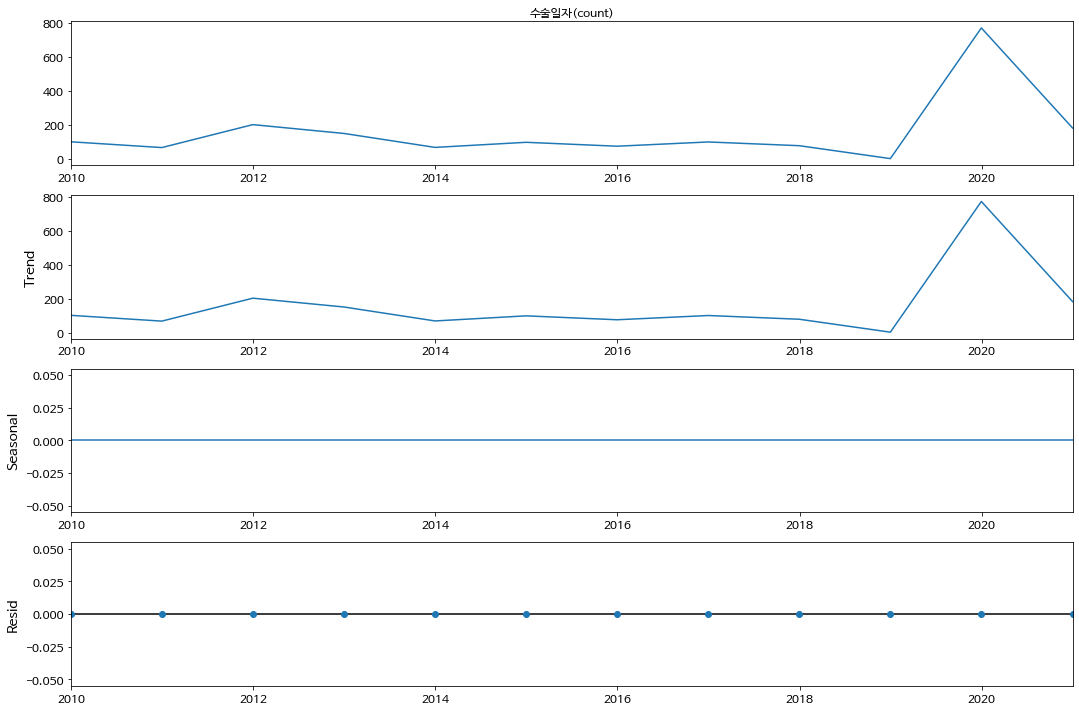

In [30]:
model_series = tsa.seasonal_decompose(y1, model='additive')
fig = model_series.plot()
plt.show()

In [31]:
import itertools # 반복수를 만드는 라이브러리 

In [32]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [33]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [34]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [35]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

1주일

In [36]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(w1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [37]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [38]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",3307.531619
47,"(1, 0, 1)","(1, 1, 1, 12)",3309.528507
27,"(0, 1, 1)","(0, 1, 1, 12)",3311.572864
31,"(0, 1, 1)","(1, 1, 1, 12)",3313.571914
59,"(1, 1, 1)","(0, 1, 1, 12)",3313.572434
...,...,...,...
10,"(0, 0, 1)","(0, 1, 0, 12)",3788.801984
50,"(1, 1, 0)","(0, 1, 0, 12)",3803.412889
2,"(0, 0, 0)","(0, 1, 0, 12)",3858.731295
0,"(0, 0, 0)","(0, 0, 0, 12)",3946.630556


In [39]:
mod = tsa.statespace.SARIMAX(w1,order=(0, 0, 1),seasonal_order=(0, 0, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        수술일자(count)   No. Observations:                  603
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood               -1806.901
Date:                            Thu, 18 Nov 2021   AIC                           3619.803
Time:                                    12:20:33   BIC                           3632.938
Sample:                                01-25-2009   HQIC                          3624.920
                                     - 08-09-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3745      0.025     15.049      0.000       0.326       0.423
ma.S.L12       0.2912      0.022   

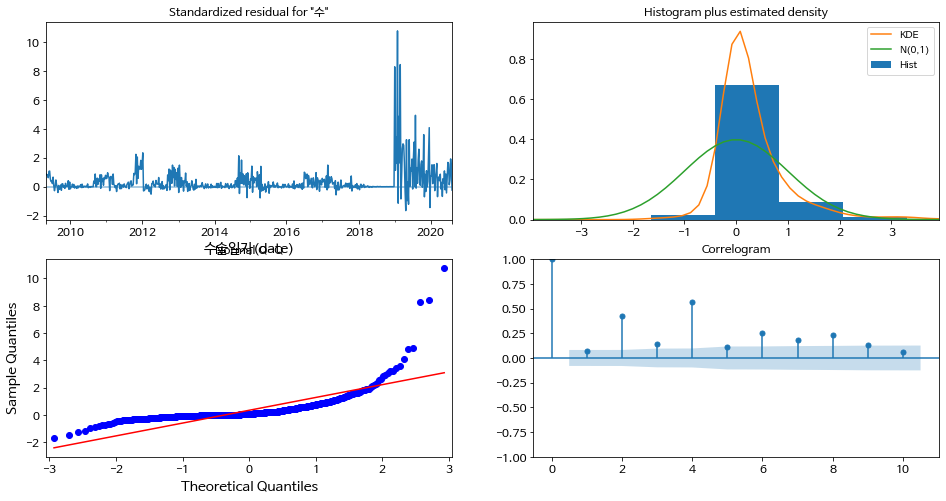

In [40]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [41]:
results.get_prediction()

In [42]:
w1.head()

수술일자(date)
2009-01-25    1
2009-02-01    1
2009-02-08    0
2009-02-15    0
2009-02-22    0
Freq: W-SUN, Name: 수술일자(count), dtype: int64

In [43]:
w1

수술일자(date)
2009-01-25     1
2009-02-01     1
2009-02-08     0
2009-02-15     0
2009-02-22     0
              ..
2020-07-12     4
2020-07-19     3
2020-07-26    10
2020-08-02    11
2020-08-09     2
Freq: W-SUN, Name: 수술일자(count), Length: 603, dtype: int64

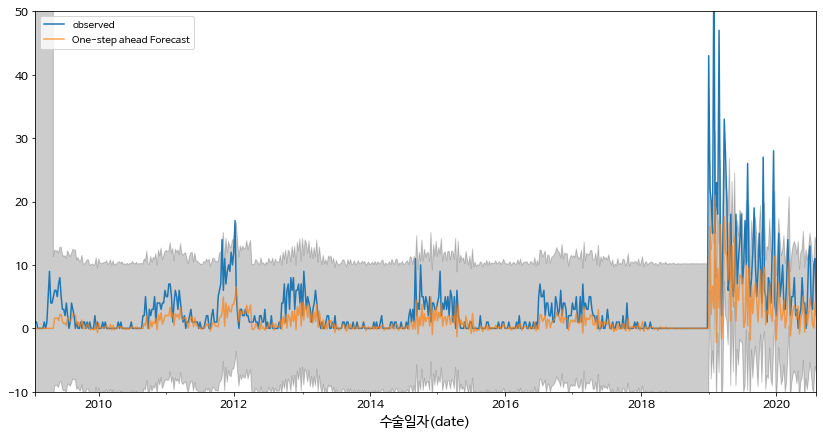

In [44]:
pred = results.get_prediction(start=pd.to_datetime('2009-01-25'), dynamic=False)
pred_ci = pred.conf_int()

plt.ylim([-10,50])
ax = w1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2009-01-25'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,수술일자(date),predicted_mean
0,2009-01-25,0.000000e+00
1,2009-02-01,0.000000e+00
2,2009-02-08,1.010906e-05
3,2009-02-15,-1.021927e-10
4,2009-02-22,1.033069e-15
...,...,...
598,2020-07-12,3.313627e+00
599,2020-07-19,6.126668e-01
600,2020-07-26,4.346580e-02
601,2020-08-02,4.181768e+00


In [46]:
w_forecasted = pred.predicted_mean
w_truth = w['2009-01-01':]
mse = ((w_forecasted - w_truth) ** 2).sum()
print('MSE {}'.format(round(mse, 2)))

MSE 16057.25


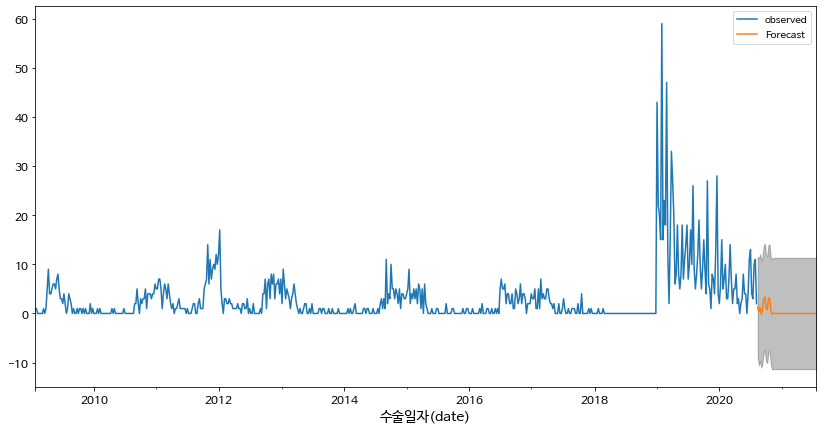

In [47]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산

ax = w1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

### 구간 조정

In [48]:
final2 = final[final['수술일자(date)'] > '2017-01-01']

In [49]:
final2.head()

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술일자(date),수술일자(count)
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,1.0,TELD,68.0,0,20190715,0,RH+A,2019-07-15,1
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,1.0,TELD,31.0,0,20190716,0,RH+A,2019-07-16,1
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,1.0,TELD,78.0,0,20190731,0,RH+B,2019-07-31,1
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,2.0,TELD,73.0,0,20190802,0,RH+O,2019-08-02,1
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,1.0,TELD,29.0,0,20190906,0,RH+A,2019-09-06,1


1W : 1주 단위 구간

- 특정 주기 단위로 분할 : 1주 단위구간

In [50]:
#수술 일자 관련
final2['수술일자(date)'] = pd.to_datetime(final2['수술일자'], format='%Y%m%d')

<ipython-input-50-6b359c67bb25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final2['수술일자(date)'] = pd.to_datetime(final2['수술일자'], format='%Y%m%d')


In [51]:
final2['수술일자(date)']

0      2019-07-15
1      2019-07-16
2      2019-07-31
3      2019-08-02
4      2019-09-06
          ...    
1889   2017-04-07
1890   2017-04-27
1891   2017-04-11
1892   2017-04-10
1893   2017-04-12
Name: 수술일자(date), Length: 1033, dtype: datetime64[ns]

In [52]:
final2['수술일자(date)'].unique

<bound method Series.unique of 0      2019-07-15
1      2019-07-16
2      2019-07-31
3      2019-08-02
4      2019-09-06
          ...    
1889   2017-04-07
1890   2017-04-27
1891   2017-04-11
1892   2017-04-10
1893   2017-04-12
Name: 수술일자(date), Length: 1033, dtype: datetime64[ns]>

In [53]:
final2['수술일자(count)'] = 1
final2.head()

<ipython-input-53-3bfdebe40e19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final2['수술일자(count)'] = 1


,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술일자(date),수술일자(count)
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,1.0,TELD,68.0,0,20190715,0,RH+A,2019-07-15,1
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,1.0,TELD,31.0,0,20190716,0,RH+A,2019-07-16,1
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,1.0,TELD,78.0,0,20190731,0,RH+B,2019-07-31,1
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,2.0,TELD,73.0,0,20190802,0,RH+O,2019-08-02,1
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,1.0,TELD,29.0,0,20190906,0,RH+A,2019-09-06,1


In [54]:
# 수술 일자 count
final2_series = pd.pivot_table(data=final2, index='수술일자(date)', values= '수술일자(count)', aggfunc='sum')
final2_series

,수술일자(count)
수술일자(date),
2017-01-02,1
2017-01-05,2
2017-01-11,1
2017-01-13,2
2017-01-16,2
...,...
2020-07-29,1
2020-07-30,3
2020-07-31,5


In [55]:
w = final2_series['수술일자(count)'].resample('1W').sum()

In [56]:
predicted_sumw1 = w.fillna(0)

In [57]:
w1

수술일자(date)
2009-01-25     1
2009-02-01     1
2009-02-08     0
2009-02-15     0
2009-02-22     0
              ..
2020-07-12     4
2020-07-19     3
2020-07-26    10
2020-08-02    11
2020-08-09     2
Freq: W-SUN, Name: 수술일자(count), Length: 603, dtype: int64

In [58]:
w1.unique()

array([ 1,  0,  5,  9,  4,  6,  7,  8,  3,  2, 14, 11, 10, 12, 17, 43, 22,
       20, 15, 59, 23, 18, 47, 33, 27, 26, 19, 13, 28])

In [59]:
rcParams['figure.figsize'] = 15,10

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

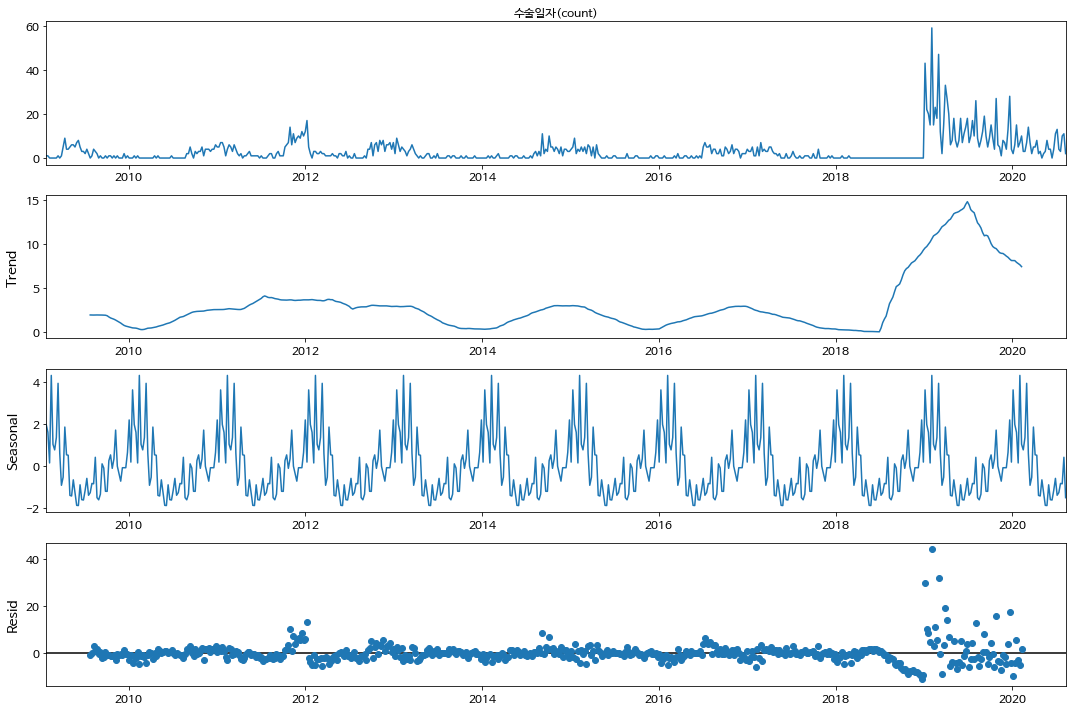

In [60]:
model_series = tsa.seasonal_decompose(w1, model='predicted_sumpredicted_sumpredicted_sumpredicted_sumadditive')
fig = model_series.plot()
plt.show()

In [61]:
import itertools # 반복수를 만드는 라이브러리 

In [63]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [64]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [65]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [66]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

1주일

In [67]:
import statsmodels.tsa.api as tsa
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(w1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [68]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [69]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",3307.531619
47,"(1, 0, 1)","(1, 1, 1, 12)",3309.528507
27,"(0, 1, 1)","(0, 1, 1, 12)",3311.572864
31,"(0, 1, 1)","(1, 1, 1, 12)",3313.571914
59,"(1, 1, 1)","(0, 1, 1, 12)",3313.572434
...,...,...,...
10,"(0, 0, 1)","(0, 1, 0, 12)",3788.801984
50,"(1, 1, 0)","(0, 1, 0, 12)",3803.412889
2,"(0, 0, 0)","(0, 1, 0, 12)",3858.731295
0,"(0, 0, 0)","(0, 0, 0, 12)",3946.630556


In [71]:
mod = tsa.statespace.SARIMAX(w1,order=(1, 0, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        수술일자(count)   No. Observations:                  603
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1649.766
Date:                            Thu, 18 Nov 2021   AIC                           3307.532
Time:                                    12:22:24   BIC                           3324.963
Sample:                                01-25-2009   HQIC                          3314.329
                                     - 08-09-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9551      0.007    127.623      0.000       0.940       0.970
ma.L1         -0.6857      0.020   

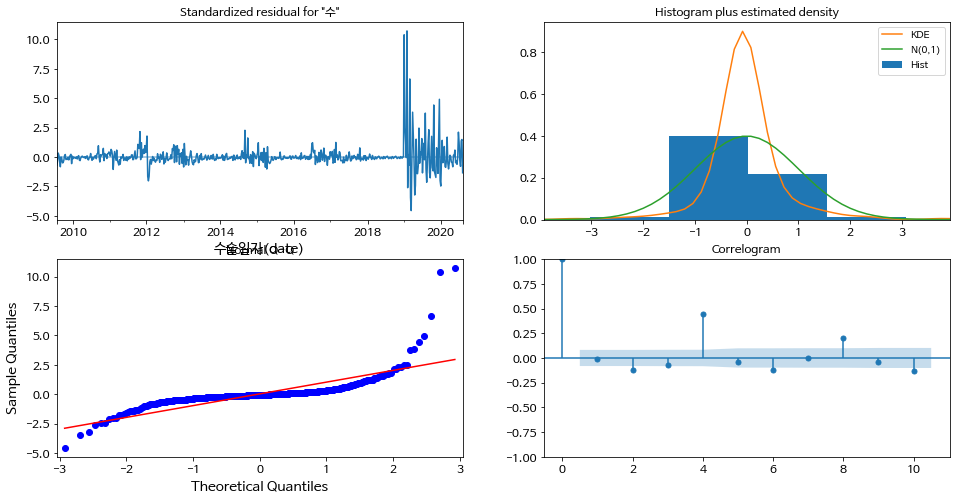

In [72]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [73]:
results.get_prediction()

In [74]:
w1.head()

수술일자(date)
2009-01-25    1
2009-02-01    1
2009-02-08    0
2009-02-15    0
2009-02-22    0
Freq: W-SUN, Name: 수술일자(count), dtype: int64

In [75]:
w1

수술일자(date)
2009-01-25     1
2009-02-01     1
2009-02-08     0
2009-02-15     0
2009-02-22     0
              ..
2020-07-12     4
2020-07-19     3
2020-07-26    10
2020-08-02    11
2020-08-09     2
Freq: W-SUN, Name: 수술일자(count), Length: 603, dtype: int64

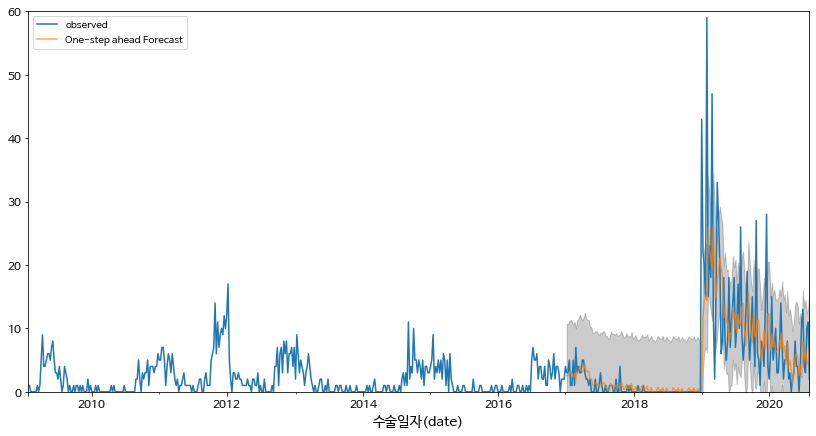

In [79]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-08'), dynamic=False)
pred_ci = pred.conf_int()

plt.ylim([0,60])
ax = w1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [80]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-08'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,수술일자(date),predicted_mean
0,2017-01-08,2.545497
1,2017-01-15,2.579354
2,2017-01-22,3.026723
3,2017-01-29,3.191478
4,2017-02-05,2.923000
...,...,...
183,2020-07-12,5.106641
184,2020-07-19,6.333528
185,2020-07-26,4.271733
186,2020-08-02,4.817843


In [81]:
w_forecasted = pred.predicted_mean
w_truth = w['2009-01-01':]
mse = ((w_forecasted - w_truth) ** 2).sum()
print('MSE {}'.format(round(mse, 2)))

MSE 8678.31


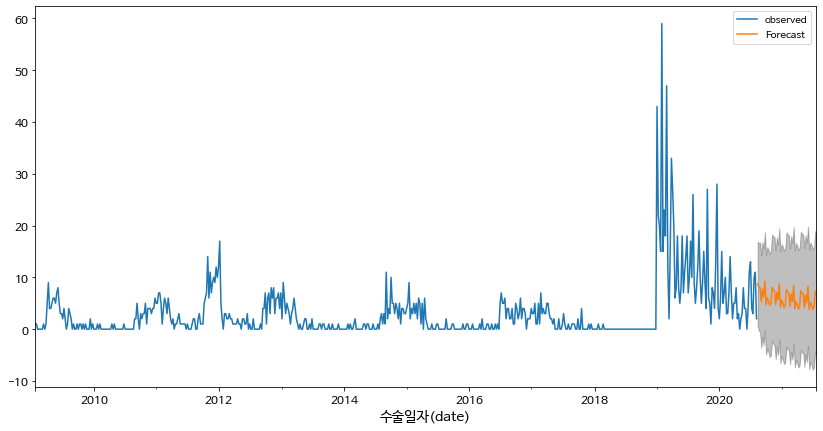

In [82]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산

ax = w1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

신규 수술 건수 유치 필요

2018년 초부터 수술 건수가 급등하는데, 2020년? 어쨌든 갑자기 감소

의사스케줄 조절 및 급등하는 수술 건수 대응 했어야 하는데 못해서 지금 일정하게 유지하는 거 같다.

그러니까 사전 대비를 해서 

의사 피로도 / 

- 실제 왜 줄었는지 찾아보기 :2018년 6~7월 급증 // 2019년 6~7월 감소 (1년 동안) : 우리 병원 문제인지 / 사회적으로 뭐가 있었는지..?

### 2017년도 이후 부터의 요일별 분석

In [83]:
final3 = final[final['수술일자(date)'] > '2017-01-01']

In [84]:
#수술 일자 관련
final3['수술일자(date)'] = pd.to_datetime(final3['수술일자'], format='%Y%m%d')

<ipython-input-84-935124a90e03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final3['수술일자(date)'] = pd.to_datetime(final3['수술일자'], format='%Y%m%d')


In [85]:
from datetime import datetime, timedelta
def 요일(date_time):
    s = str(date_time)
    days = ['월','화','수','목','금','토','일']
    date = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
    return days[date.weekday()]


In [86]:
final3['수술일자(weekday)'] = final['수술일자'].apply(요일)

<ipython-input-86-fdc1cdf2488c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final3['수술일자(weekday)'] = final['수술일자'].apply(요일)


In [87]:
final3

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,수술일자(date),수술일자(count),수술일자(weekday)
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,1.0,TELD,68.0,0,20190715,0,RH+A,2019-07-15,1,월
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,1.0,TELD,31.0,0,20190716,0,RH+A,2019-07-16,1,화
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,1.0,TELD,78.0,0,20190731,0,RH+B,2019-07-31,1,수
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,2.0,TELD,73.0,0,20190802,0,RH+O,2019-08-02,1,금
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,1.0,TELD,29.0,0,20190906,0,RH+A,2019-09-06,1,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,...,12.0,NaN,80.0,0,20170407,0,RH+A,2017-04-07,1,금
1890,1891PT,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,...,6.0,NaN,20.0,0,20170427,0,RH+B,2017-04-27,1,목
1891,1892PT,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,...,1.0,IELD,50.0,0,20170411,0,RH+O,2017-04-11,1,화
1892,1893PT,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,...,24.0,NaN,25.0,0,20170410,0,RH+A,2017-04-10,1,월


In [88]:
data_weekdays = final3.groupby(by=['수술일자(weekday)']).sum()
print(data_weekdays)

               전방디스크높이(mm)  후방디스크높이(mm)     지방축적도  Instability    MF + ES  \
수술일자(weekday)                                                               
금                  1739.41      1196.54  36412.25            6  309312.21   
목                  2313.05      1669.85  44377.94           10  429639.93   
수                  1920.19      1415.98  33489.85            6  340388.55   
월                  1669.92      1285.18  30675.68            5  308651.21   
일                   981.89       672.08  28037.91            4  183389.39   
토                  1397.95      1002.35  32460.54            5  254776.22   
화                  1902.07      1409.04  39003.04            7  348227.17   

               Modic change      PI      PT  Seg Angle(raw)  Vaccum disc  ...  \
수술일자(weekday)                                                             ...   
금                        30  7540.5  2382.4         2336.43            6  ...   
목                        57  9301.5  3243.7         3041.13    

In [89]:
# 수술 일자 count
count_1= pd.pivot_table(data=final3, index='수술일자(weekday)', values= '수술일자(count)', aggfunc='sum')
count_1

,수술일자(count)
수술일자(weekday),
금,152
목,205
수,160
월,145
일,85
토,122
화,164


In [90]:
# data_weekdays_time = data_weekdays['수술건수']

In [91]:
final3['수술월(month)'] = final3['수술일자(date)'].dt.month
final3['수술연도(year)']= final3['수술일자(date)'].dt.year

<ipython-input-91-4a6d468a510b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final3['수술월(month)'] = final3['수술일자(date)'].dt.month
<ipython-input-91-4a6d468a510b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final3['수술연도(year)']= final3['수술일자(date)'].dt.year


In [92]:
final3['수술연도(year)'].unique()

array([2019, 2020, 2017, 2018])

### 2019,2020년도 한정 월별, 요일별 분석

In [93]:
cond1 = (final3['수술연도(year)']==2019)
cond2 = (final3['수술연도(year)']==2020)

final_year = final3.loc[cond1|cond2]
count_2= pd.pivot_table(data=final_year, index=['수술월(month)','수술일자(weekday)'], values= '수술일자(count)', aggfunc='sum')
count_3= count_2.reset_index()

In [94]:
count_3

,수술월(month),수술일자(weekday),수술일자(count)
0,1,금,20
1,1,목,54
2,1,수,28
3,1,월,24
4,1,일,12
...,...,...,...
77,12,수,15
78,12,월,5
79,12,일,3
80,12,토,9


<AxesSubplot:xlabel='수술일자(weekday)', ylabel='수술일자(count)'>

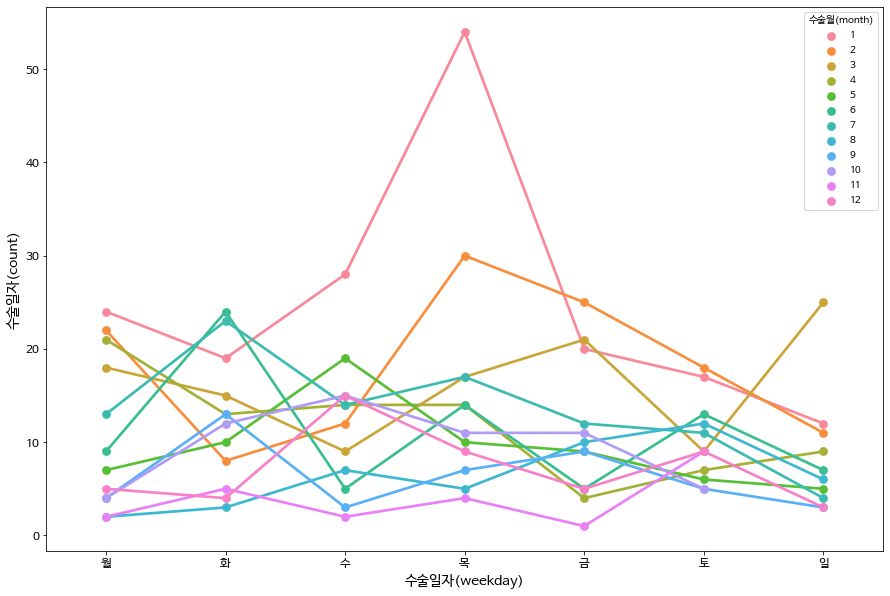

In [95]:
sns.pointplot(data=count_3, x='수술일자(weekday)', y='수술일자(count)',hue='수술월(month)',
             order=['월','화','수','목','금','토','일'])

In [96]:
final3.columns

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'Large Lymphocyte',
       'Location of herniation', 'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수',
       '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환',
       '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업', '체중', '퇴원일자',
       '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법', '수술시간',
       '수술실패여부', '수술일자', '재발여부', '혈액형', '수술일자(date)', '수술일자(count)',
       '수술일자(weekday)', '수술월(month)', '수술연도(year)'],
      dtype='object')

In [ ]:
final3['직업'].unique()

In [ ]:
cond1 = (final3['수술연도(year)']==2019)
cond2 = (final3['수술연도(year)']==2020)
cond3 = (final3['직업']=='사무직')

final_year = final3.loc[(cond1|cond2)&cond3]

count_2= pd.pivot_table(data=final_year, index=['수술월(month)','수술일자(weekday)'], values= '수술일자(count)', aggfunc='sum')
count_3= count_2.reset_index()

cond4 = (count_3['수술월(month)']==1)
count_4 = count_3.loc[cond4]
sns.barplot(data=count_4, x='수술일자(weekday)', y='수술일자(count)',order=['월','화','수','목','금','토','일'],ci=None)

In [ ]:
cond1 = (final3['수술연도(year)']==2019)
cond2 = (final3['수술연도(year)']==2020)
cond3 = (final3['직업']=='사무직')

final_year = final3.loc[(cond1|cond2)&cond3]

count_2= pd.pivot_table(data=final_year, index=['수술월(month)','수술일자(weekday)'], values= '수술일자(count)', aggfunc='sum')
count_3= count_2.reset_index()

cond4 = (count_3['수술월(month)']==10)
count_4 = count_3.loc[cond4]
sns.barplot(data=count_4, x='수술일자(weekday)', y='수술일자(count)',order=['월','화','수','목','금','토','일'],ci=None)

In [ ]:
수술실패여부cond1 = (final3['수술연도(year)']==2019)
cond2 = (final3['수술연도(year)']==2020)
cond3 = (final3['직업']=='사무직')

final_year = final3.loc[(cond1|cond2)&cond3]

count_2= pd.pivot_table(data=final_year, index=['수술월(month)','수술일자(weekday)'], values= '수술일자(count)', aggfunc='sum')
count_3= count_2.reset_index()

cond4 = (count_3['수술월(month)']==12)
count_4 = count_3.loc[cond4]
sns.barplot(data=count_4, x='수술일자(weekday)', y='수술일자(count)',order=['월','화','수','목','금','토','일'],ci=None)

### 전체 연도 - 요일별 수술 건수

전체 연도

In [ ]:
final['수술월(month)'] = final['수술일자(date)'].dt.month
final['수술연도(year)']= final['수술일자(date)'].dt.year

In [ ]:
final

전체 년도

In [ ]:
#수술 일자 관련
final['수술일자(date)'] = pd.to_datetime(final['수술일자'], format='%Y%m%d')

In [ ]:
from datetime import datetime, timedelta
def 요일(date_time):
    s = str(date_time)
    days = ['월','화','수','목','금','토','일']
    date = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
    return days[date.weekday()]


In [ ]:
final['수술일자(weekday)'] = final['수술일자'].apply(요일)

In [ ]:
count_2= pd.pivot_table(data=final, index=['수술일자(weekday)'], values= '수술일자(count)', aggfunc='sum')
count_3= count_2.reset_index()

# count_4 = count_3.loc[cond4]
sns.barplot(data=count_3, x='수술일자(weekday)', y='수술일자(count)',order=['월','화','수','목','금','토','일'],ci=None)

In [ ]:
count_2

### 년도별 꺾은선 그래프

In [ ]:
count_2= pd.pivot_table(data=final, index=['수술연도(year)','수술일자(weekday)'], values= '수술일자(count)', aggfunc='sum')
count_3= count_2.reset_index()

In [ ]:
count_3

In [ ]:
sns.pointplot(data=count_3, x='수술일자(weekday)', y='수술일자(count)',hue='수술연도(year)',
             order=['월','화','수','목','금','토','일'])

In [ ]:
import seaborn as sns

# 연령대 통증기간 긴지? -> 참아온것 이를 개선할 수 있는가?
def 연령(age):
  return age//10

final['연령대'] = final['연령'].apply(연령)

In [ ]:
final

In [ ]:
count_2= pd.pivot_table(data=final, index=['연령대'], values= '수술일자(count)', aggfunc='sum')
count_3= count_2.reset_index()

# count_4 = count_3.loc[cond4]
sns.barplot(data=count_3, x='연령대', y='수술일자(count)',order=['1','2','3','4','5','6','7','8'],ci=None)

In [ ]:
pd.pivot_table(data=final, index=['연령대'], values= '수술일자(count)', aggfunc='sum')